<h2><center>DSCI 531 - Fairness in Artificial Intelligence - Spring 2022</center></h2>
<h2><center>Project - Bias in Graduation in Colleges</center></h2>
<h2><center>Name: Chia-Yu Chen</center></h2>

- ### Data: "American University Data" IPEDS dataset
- ### Data Source: https://www.kaggle.com/datasets/sumithbhongale/american-university-data-ipeds-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn import preprocessing

In [2]:
# Read the data and have a quick look at it
raw_data = pd.read_excel('IPEDS_data.xlsx')

print("The dataset has {} rows and {} variables.".format(raw_data.shape[0], raw_data.shape[1]))

raw_data.head(5)

The dataset has 1534 rows and 145 variables.


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
list(raw_data)

['ID number',
 'Name',
 'year',
 'ZIP code',
 'Highest degree offered',
 'County name',
 'Longitude location of institution',
 'Latitude location of institution',
 'Religious affiliation',
 'Offers Less than one year certificate',
 'Offers One but less than two years certificate',
 "Offers Associate's degree",
 'Offers Two but less than 4 years certificate',
 "Offers Bachelor's degree",
 'Offers Postbaccalaureate certificate',
 "Offers Master's degree",
 "Offers Post-master's certificate",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 "Offers Doctor's degree - other",
 'Offers Other degree',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentil

## 1. Data cleaning and preprocessing

In [4]:
# Data cleaning by dropping rows with missing graduation rate
data = raw_data.dropna(subset=['Graduation rate - Bachelor degree within 4 years, total', 
                               'Graduation rate - Bachelor degree within 5 years, total', 
                               'Graduation rate - Bachelor degree within 6 years, total'])

# Feature selection by selecting related variables (County, Region, Race, Scores, Bachelor's Graduation Rate)
# Note: Basically, the feature selection process is based on the following results from box plot and correlation matrix.
data = data[['County name', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 
             'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score', 
             'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 
             'SAT Writing 75th percentile score', 'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score', 
             "Bachelor's degrees awarded", "Number of students receiving a Bachelor's degree", 
             'State abbreviation', 'FIPS state code', 'Geographic region', 'Sector of institution', 'Control of institution', 
             'Historically Black College or University', 'Degree of urbanization (Urban-centric locale)', 
             'Percent of undergraduate enrollment that are American Indian or Alaska Native', 
             'Percent of undergraduate enrollment that are Asian', 
             'Percent of undergraduate enrollment that are Black or African American', 
             'Percent of undergraduate enrollment that are Hispanic/Latino', 
             'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander', 
             'Percent of undergraduate enrollment that are White', 
             'Percent of undergraduate enrollment that are two or more races', 
             'Percent of undergraduate enrollment that are Race/ethnicity unknown', 
             'Percent of undergraduate enrollment that are Nonresident Alien', 
             'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander', 
             'Graduation rate - Bachelor degree within 6 years, total']]

print("After data cleaning, there are {} rows and {} variables.".format(data.shape[0], data.shape[1]))

After data cleaning, there are 1476 rows and 31 variables.


In [5]:
# Rename columns' names to present more clearer x and y ticks in upcoming graphs
strings_to_replace = {'Percent of freshmen ': '%_freshmen ', 
                      'percentile score': 'percentile', 
                      'Percent of undergraduate enrollment that are ': '', 
                      ' - ': '_', 
                      'freshmen  ': 'freshmen ', 
                      'Graduation rate_Bachelor degree within 6 years, total': 'Graduation rate'}

for key, value in strings_to_replace.items():
    data.columns = data.columns.str.replace(key, value)

# Rename specific column name to present more clearer x and y ticks in upcoming graphs
data.rename(columns = {'Degree of urbanization (Urban-centric locale)': 'Degree of urbanization'}, inplace = True)

list(enumerate(data.columns))

[(0, 'County name'),
 (1, '%_freshmen submitting SAT scores'),
 (2, '%_freshmen submitting ACT scores'),
 (3, 'SAT Critical Reading 25th percentile'),
 (4, 'SAT Critical Reading 75th percentile'),
 (5, 'SAT Math 25th percentile'),
 (6, 'SAT Math 75th percentile'),
 (7, 'SAT Writing 25th percentile'),
 (8, 'SAT Writing 75th percentile'),
 (9, 'ACT Composite 25th percentile'),
 (10, 'ACT Composite 75th percentile'),
 (11, "Bachelor's degrees awarded"),
 (12, "Number of students receiving a Bachelor's degree"),
 (13, 'State abbreviation'),
 (14, 'FIPS state code'),
 (15, 'Geographic region'),
 (16, 'Sector of institution'),
 (17, 'Control of institution'),
 (18, 'Historically Black College or University'),
 (19, 'Degree of urbanization'),
 (20, 'American Indian or Alaska Native'),
 (21, 'Asian'),
 (22, 'Black or African American'),
 (23, 'Hispanic/Latino'),
 (24, 'Native Hawaiian or Other Pacific Islander'),
 (25, 'White'),
 (26, 'two or more races'),
 (27, 'Race/ethnicity unknown'),
 (28

In [6]:
data['Degree of urbanization'].unique()

array(['City: Midsize', 'City: Small', 'Town: Distant', 'Rural: Remote',
       'Suburb: Large', 'Rural: Fringe', 'City: Large', 'Suburb: Small',
       'Town: Remote', 'Rural: Distant', 'Suburb: Midsize',
       'Town: Fringe'], dtype=object)

In [7]:
# Rename Geographic region column values to present more clearer ticks in upcoming graphs
data['Geographic region'] = data['Geographic region'].replace({'Far West AK CA HI NV OR WA': 'Far West', 
                                                               'Great Lakes IL IN MI OH WI': 'Great Lakes', 
                                                               'Mid East DE DC MD NJ NY PA': 'Mid East', 
                                                               'New England CT ME MA NH RI VT': 'New England', 
                                                               'Plains IA KS MN MO NE ND SD': 'Plains', 
                                                               'Rocky Mountains CO ID MT UT WY': 'Rocky Mountains', 
                                                               'Southeast AL AR FL GA KY LA MS NC SC TN VA WV': 'Southeast', 
                                                               'Southwest AZ NM OK TX': 'Southwest'})

# Correct Geographic region column value
data['Geographic region'] = data['Geographic region'].replace({'US Service schools': 'Mid East'})  # this college is in NY

# Rename Degree of urbanization (Urban-centric locale) column values to present more clearer ticks in upcoming graphs
data['Degree of urbanization'] = data['Degree of urbanization'].replace({'City: Large': 'City', 
                                                                         'City: Midsize': 'City', 
                                                                         'City: Small': 'City', 
                                                                         'Rural: Distant': 'Rural/Suburb/Town', 
                                                                         'Rural: Fringe': 'Rural/Suburb/Town', 
                                                                         'Rural: Remote': 'Rural/Suburb/Town', 
                                                                         'Suburb: Large': 'Rural/Suburb/Town', 
                                                                         'Suburb: Midsize': 'Rural/Suburb/Town', 
                                                                         'Suburb: Small': 'Rural/Suburb/Town', 
                                                                         'Town: Distant': 'Rural/Suburb/Town', 
                                                                         'Town: Fringe': 'Rural/Suburb/Town', 
                                                                         'Town: Remote': 'Rural/Suburb/Town'})

## 2. Data analysis and protected feature selection

- ### Correlation matrix of Race & Graduation Rate

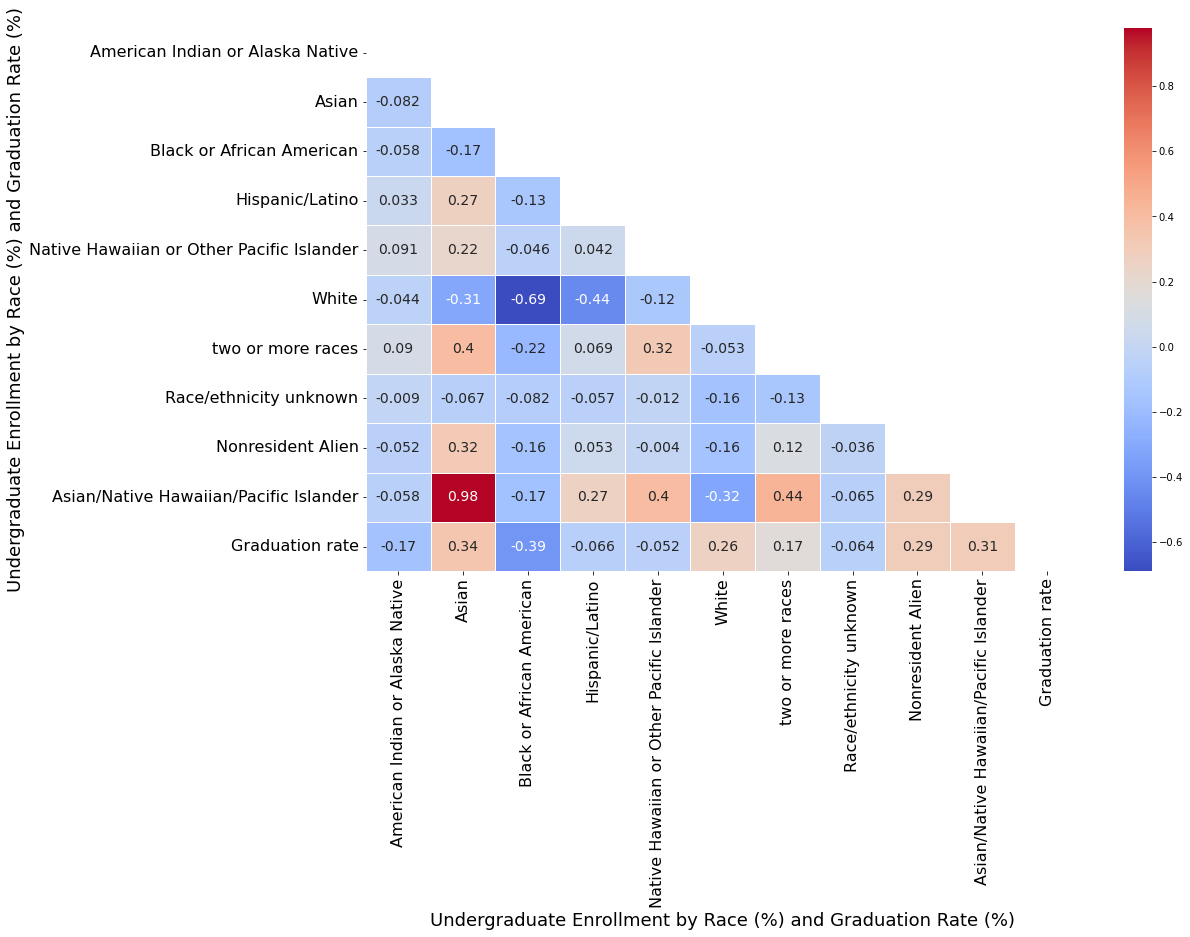

In [8]:
# Define the dataframe for Race & Graduation Rate
df_race = data.iloc[:, 20:30]
df_graduation_rate = data.iloc[:, -1]
df_race_grad = pd.concat([df_race, df_graduation_rate], axis=1)

# Compute the correlation matrix
corr = df_race_grad.corr()

# Generate a mask for the upper triangle
upper_mask = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Draw the heatmap
sns.heatmap(corr, 
            cmap=sns.color_palette('coolwarm', as_cmap=True), 
            annot=True, 
            annot_kws={'size': 14}, 
            linewidths=0.5, 
            mask=upper_mask)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Undergraduate Enrollment by Race (%) and Graduation Rate (%)", fontsize=18)
plt.ylabel("Undergraduate Enrollment by Race (%) and Graduation Rate (%)", fontsize=18)
# plt.title("Correlation Matrix of Race & Graduation Rate", fontsize=24)
plt.savefig('cm_race_grad.png', bbox_inches='tight')
plt.show()

- ### Correlation matrix of SAT/ACT Scores & Graduation Rate

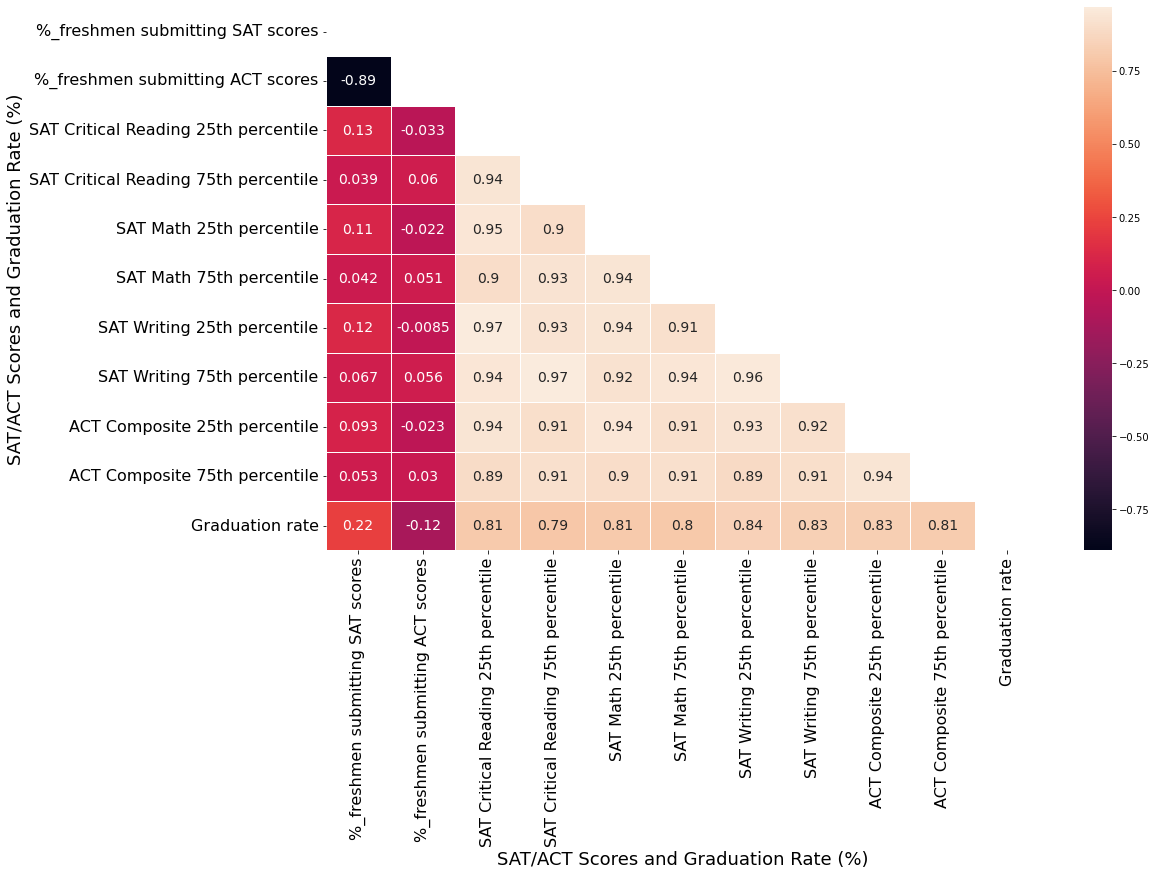

In [9]:
# Define the dataframe for SAT/ACT Scores & Graduation Rate
df_sat_act = data.iloc[:, 1:11]
df_graduation_rate = data.iloc[:, -1]
df_sat_act_grad = pd.concat([df_sat_act, df_graduation_rate], axis=1)

# Compute the correlation matrix
corr = df_sat_act_grad.corr()

# Generate a mask for the upper triangle
upper_mask = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Draw the heatmap
sns.heatmap(corr, 
            cmap=sns.color_palette('rocket', as_cmap=True), 
            annot=True, 
            annot_kws={'size': 14}, 
            linewidths=0.5, 
            mask=upper_mask)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("SAT/ACT Scores and Graduation Rate (%)", fontsize=18)
plt.ylabel("SAT/ACT Scores and Graduation Rate (%)", fontsize=18)
# plt.title("Correlation Matrix of SAT/ACT Scores & Graduation Rate", fontsize=24)
plt.savefig('cm_sat_act_grad.png', bbox_inches='tight')
plt.show()

- ### Correlation matrix of Financial Aid & Graduation Rate

#### NOTE: Since the result shows that that there is basically no relationship between the financial aid and the graduation rate, I choose not to include this part into the report.

In [10]:
# # Define the dataframe for Financial Aid & Graduation Rate
# df_aid = data.iloc[:, 30:40]
# df_graduation_rate = data.iloc[:, -1]
# df_aid_grad = pd.concat([df_aid, df_graduation_rate], axis=1)

# # Compute the correlation matrix
# corr = df_aid_grad.corr()

# # Generate a mask for the upper triangle
# upper_mask = np.triu(corr)

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(18, 18))

# # Draw the heatmap
# sns.heatmap(corr, 
#             cmap=sns.color_palette('vlag', as_cmap=True), 
#             annot=True, 
#             annot_kws={'size': 14}, 
#             linewidths=0.5, 
#             mask=upper_mask)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel("Financial Aid & Grad Rate", fontsize=20)
# plt.ylabel("Financial Aid & Grad Rate", fontsize=20)
# plt.title("Correlation Matrix of Financial Aid & Graduation Rate", fontsize=24)
# plt.savefig('cm_aid_grad.png', bbox_inches='tight')
# plt.show()

- ### Box plots

In [11]:
# Rename graduation rate column name to avoid error
strings_to_replace = {'Graduation rate': 'Graduation rate_Bachelor degree within 6 years, total'}

for key, value in strings_to_replace.items():
    data.columns = data.columns.str.replace(key, value)

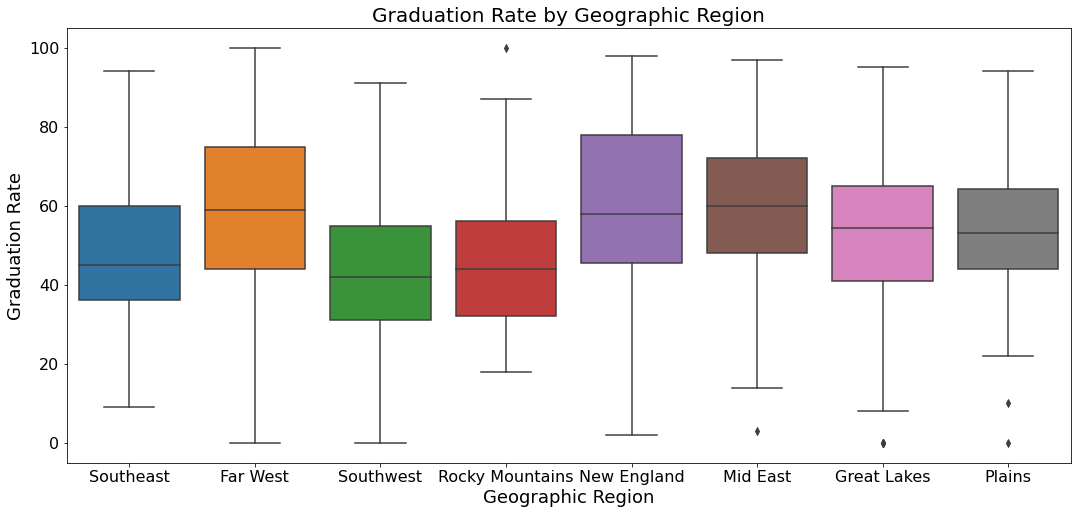

In [12]:
# Draw the boxplot of graduation rate by different geographic region
f, ax = plt.subplots(figsize=(18, 8))
sns.boxplot(x='Geographic region', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Geographic Region", fontsize=18)
plt.ylabel("Graduation Rate", fontsize=18)
plt.title("Graduation Rate by Geographic Region", fontsize=20)
plt.savefig('boxplot_geo.png', bbox_inches='tight')
plt.show()

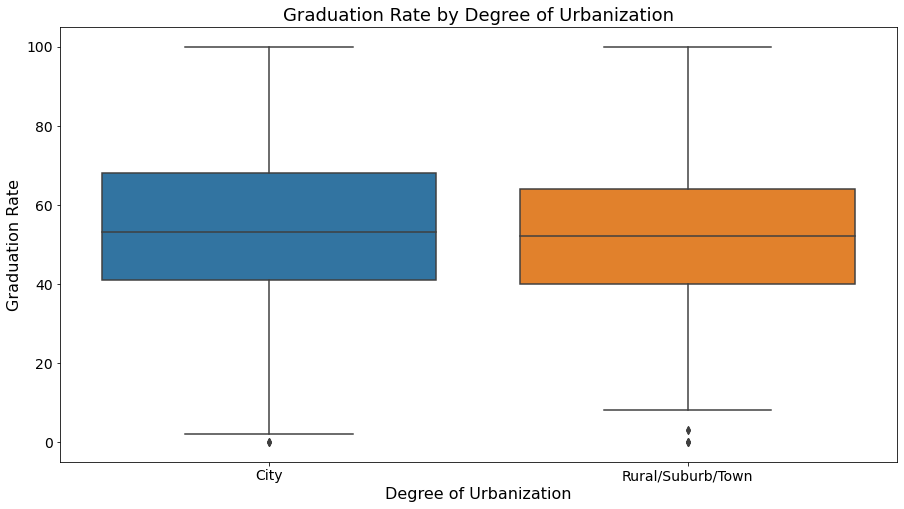

In [13]:
# Draw the boxplot of graduation rate by degree of urbanization
f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='Degree of urbanization', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Degree of Urbanization", fontsize=16)
plt.ylabel("Graduation Rate", fontsize=16)
plt.title("Graduation Rate by Degree of Urbanization", fontsize=18)
plt.savefig('boxplot_urbanization.png', bbox_inches='tight')
plt.show()

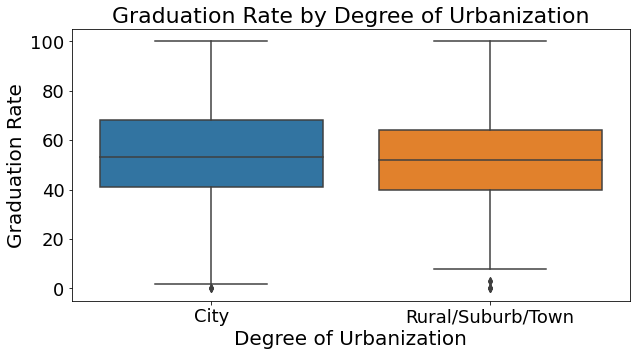

In [14]:
# Draw the boxplot of graduation rate by degree of urbanization
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='Degree of urbanization', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Degree of Urbanization", fontsize=20)
plt.ylabel("Graduation Rate", fontsize=20)
plt.title("Graduation Rate by Degree of Urbanization", fontsize=22)
plt.savefig('boxplot_urbanization_ppt.png', bbox_inches='tight')
plt.show()

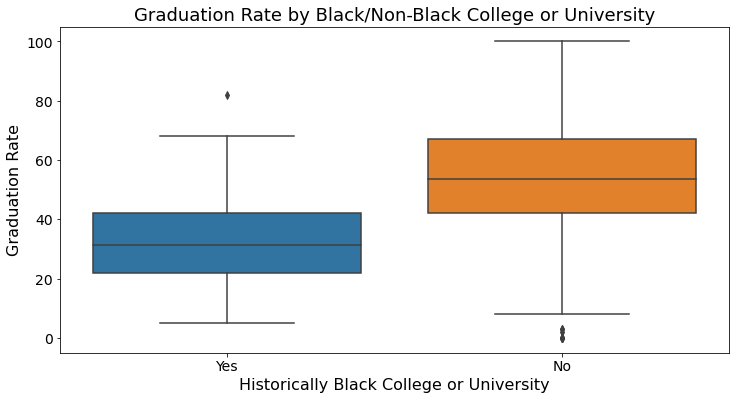

In [15]:
# Draw the boxplot of graduation rate by historically black college or university
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Historically Black College or University', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Historically Black College or University", fontsize=16)
plt.ylabel("Graduation Rate", fontsize=16)
plt.title("Graduation Rate by Black/Non-Black College or University", fontsize=18)
plt.savefig('boxplot_black_nonblack.png', bbox_inches='tight')
plt.show()

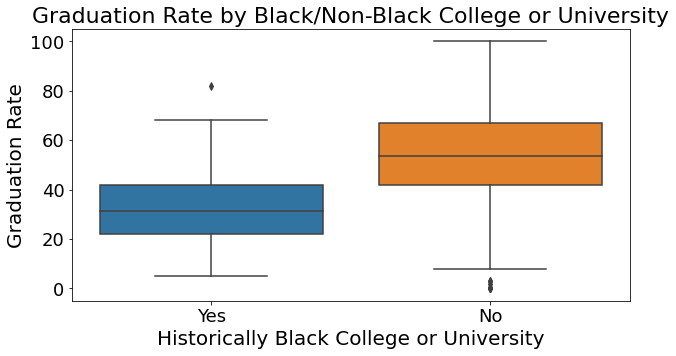

In [16]:
# Draw the boxplot of graduation rate by historically black college or university
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='Historically Black College or University', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Historically Black College or University", fontsize=20)
plt.ylabel("Graduation Rate", fontsize=20)
plt.title("Graduation Rate by Black/Non-Black College or University", fontsize=22)
plt.savefig('boxplot_black_nonblack_ppt.png', bbox_inches='tight')
plt.show()

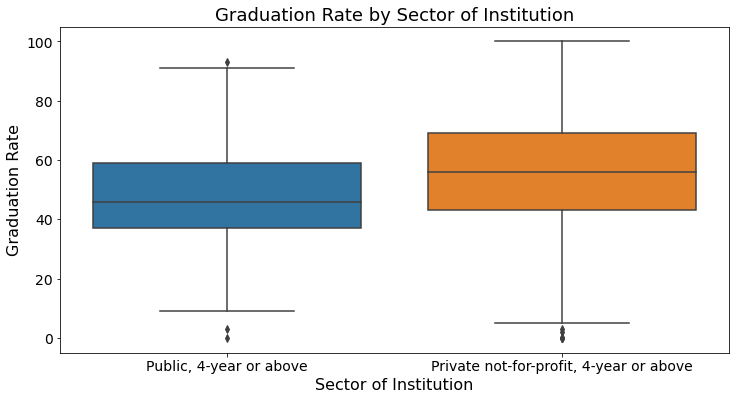

In [17]:
# Draw the boxplot of graduation rate by sector of institution
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Sector of institution', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sector of Institution", fontsize=16)
plt.ylabel("Graduation Rate", fontsize=16)
plt.title("Graduation Rate by Sector of Institution", fontsize=18)
plt.savefig('boxplot_pub_pri.png', bbox_inches='tight')
plt.show()

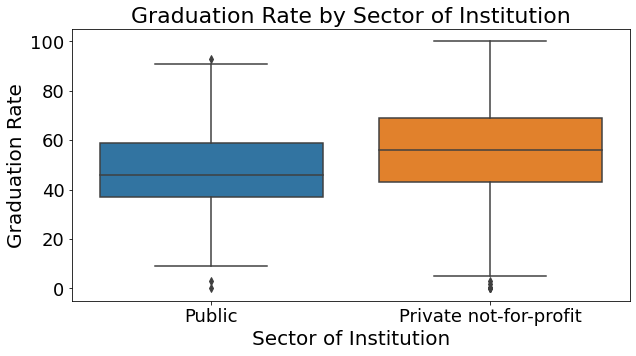

In [18]:
# Draw the boxplot of graduation rate by sector of institution
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='Control of institution', y='Graduation rate_Bachelor degree within 6 years, total', data=data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Sector of Institution", fontsize=20)
plt.ylabel("Graduation Rate", fontsize=20)
plt.title("Graduation Rate by Sector of Institution", fontsize=22)
plt.savefig('boxplot_pub_pri_ppt.png', bbox_inches='tight')
plt.show()

## 3. Statistical analysis on protected feature

### 3.1 Protected feature: Race (i.e., "Historically Black College or University" column)

- ### Split data into train data and test data

Here, I use the Pareto Principle, which is the 80/20 rule, to split the dataset into a training data and test data.

In [19]:
# Fill the missing values by imputing average values of each columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, random_state=50)

- ### Set up the threshold of graduation rate (i.e., 45%)

In [20]:
# To keep data balanced, this cell is for testing different threshold of graduation rate to determine the optimal threshold
# data['Graduation rate_Bachelor degree within 6 years, total'] = np.where(data['Graduation rate_Bachelor degree within 6 years, total'] <= 45, 0, 1)
# counts = data['Graduation rate_Bachelor degree within 6 years, total'].value_counts()
# counts

In [21]:
# The goal is to predict whether the graduation rate exceeds 45% based on other features.
# (1 → graduation rate > 45%, 0 → graduation rate <= 45%).
# The protected feature is Historically Black College or University (1 → yes, 0 → no).
df_train['Historically Black College or University'] = df_train['Historically Black College or University'].map({'Yes': 1, 'No': 0})
df_test['Historically Black College or University'] = df_test['Historically Black College or University'].map({'Yes': 1, 'No': 0})
df_train['Graduation rate_Bachelor degree within 6 years, total'] = np.where(df_train['Graduation rate_Bachelor degree within 6 years, total'] <= 45, 0, 1)
df_test['Graduation rate_Bachelor degree within 6 years, total'] = np.where(df_test['Graduation rate_Bachelor degree within 6 years, total'] <= 45, 0, 1)

- ### Compare the means of the graduation rate across different protected groups.

#### NOTE: Since the t-test result is more meaningful than mean value here, I choose not to include this part into the report.

In [22]:
# # Calculate the mean graduation rate of two protected groups. Only use the training data df_train. 
# mean_grad_rate_black = df_train[df_train['Historically Black College or University'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
# mean_grad_rate_non_black = df_train[df_train['Historically Black College or University'] == 0]['Graduation rate_Bachelor degree within 6 years, total'].mean()

# print("the mean graduation rate of black college or university: " + str(mean_grad_rate_black))  # 0.5
# print("the mean graduation rate of non-black college or university: " + str(mean_grad_rate_non_black))  # 0.909579230080573

- ### Perform a t-test on the graduation rate between the two protected groups. Report the p-value. Check if the test result is significant or not.

In [23]:
# Rename column name in order to avoid Python syntax issue when using .query() method
df_train.rename(columns = {'Historically Black College or University': 'black_university'}, inplace = True)

In [24]:
# t-test between outcome of two protected groups. Only use the training data df_train.
non_black = df_train.query('black_university == 0')['Graduation rate_Bachelor degree within 6 years, total']
black = df_train.query('black_university == 1')['Graduation rate_Bachelor degree within 6 years, total']
res_grad = stats.ttest_ind(non_black, black)
p_value_grad = res_grad[1]

print("the p-value of graduation rate dataset: " + str(p_value_grad))

the p-value of graduation rate dataset: 8.559452132273826e-15


- ### Conclusion/Explanation from statistical analysis:

We can find that the p-value is less than the significance level alpha (e.g., 0.05), so it is statistically significant for graduation rate dataset. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

Furthermore, this means that we can conclude that the black college or university’s average graduation rate is statistically different from the non-black college or university’s average graduation rate, i.e., there is a strong relationship between these two variables, race and graduation rate.

### 3.2 Protected feature: Region (i.e., "Geographic region" column)

In [25]:
data_for_region = data.copy()

In [26]:
# Since there are 8 unique values in "Geographic region" column, I use one-hot encodings to deal with this first.
dummies = pd.get_dummies(data=data_for_region['Geographic region']).rename(columns=lambda x: 'region_' + str(x))
data_for_region.drop(['Geographic region'], inplace=True, axis=1)
data_for_region = pd.concat([data_for_region, dummies], axis=1)

- ### Split data into train data and test data

Here, I use the Pareto Principle, which is the 80/20 rule, to split the dataset into a training data and test data.

In [27]:
# Fill the missing values by imputing average values of each columns
data_for_region.replace([np.inf, -np.inf], np.nan, inplace=True)
data_for_region.fillna(data_for_region.mean(), inplace=True)

from sklearn.model_selection import train_test_split
df_train_region, df_test_region = train_test_split(data_for_region, test_size=0.2, random_state=100)

- ### Compare the means of the graduation rate across different protected groups.

In [28]:
# # Calculate the mean graduation rate of two protected groups. Use the whole dataset.
# # this section is for the quick view of whole data only
# whole_data_for_region = data.copy()
# whole_data_for_region.groupby('Geographic region')['Graduation rate_Bachelor degree within 6 years, total'].mean()

In [29]:
# Calculate the mean graduation rate of two protected groups. Only use the training data df_train_region.
mean_grad_rate_FarWest = df_train_region[df_train_region['region_Far West'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_GreatLakes = df_train_region[df_train_region['region_Great Lakes'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_MidEast = df_train_region[df_train_region['region_Mid East'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_NewEngland = df_train_region[df_train_region['region_New England'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_Plains = df_train_region[df_train_region['region_Plains'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_RockyMountains = df_train_region[df_train_region['region_Rocky Mountains'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_Southeast = df_train_region[df_train_region['region_Southeast'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()
mean_grad_rate_Southwest = df_train_region[df_train_region['region_Southwest'] == 1]['Graduation rate_Bachelor degree within 6 years, total'].mean()

print("the mean graduation rate of Far West: " + str(mean_grad_rate_FarWest))
print("the mean graduation rate of Great Lakes: " + str(mean_grad_rate_GreatLakes))
print("the mean graduation rate of Mid East: " + str(mean_grad_rate_MidEast))
print("the mean graduation rate of New England: " + str(mean_grad_rate_NewEngland))
print("the mean graduation rate of Plains: " + str(mean_grad_rate_Plains))
print("the mean graduation rate of Rocky Mountains: " + str(mean_grad_rate_RockyMountains))
print("the mean graduation rate of Southeast: " + str(mean_grad_rate_Southeast))
print("the mean graduation rate of Southwest: " + str(mean_grad_rate_Southwest))

the mean graduation rate of Far West: 60.98148148148148
the mean graduation rate of Great Lakes: 51.73480662983425
the mean graduation rate of Mid East: 59.04424778761062
the mean graduation rate of New England: 60.06666666666667
the mean graduation rate of Plains: 54.45
the mean graduation rate of Rocky Mountains: 43.86486486486486
the mean graduation rate of Southeast: 47.658940397350996
the mean graduation rate of Southwest: 42.83168316831683


- ### Perform a t-test on the graduation rate between the two protected groups. Report the p-value. Check if the test result is significant or not.

In [30]:
# Rename column name in order to avoid Python syntax issue when using .query() method
region_dict_rename = {'region_Far West': 'region_FarWest', 
               'region_Great Lakes': 'region_GreatLakes', 
               'region_Mid East': 'region_MidEast', 
               'region_New England': 'region_NewEngland', 
               'region_Rocky Mountains': 'region_RockyMountains'}

df_train_region.rename(columns = region_dict_rename, inplace = True)

In [31]:
df_train_region['Graduation rate_Bachelor degree within 6 years, total'] = np.where(df_train_region['Graduation rate_Bachelor degree within 6 years, total'] <= 45, 0, 1)

In [32]:
# t-test between outcome of two protected groups. Only use the training data df_train_region.
FarWest = df_train_region.query('region_FarWest == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_FarWest = df_train_region.query('region_FarWest == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_FarWest = stats.ttest_ind(FarWest, non_FarWest)
p_value_grad_FarWest = res_grad_FarWest[1]

GreatLakes = df_train_region.query('region_GreatLakes == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_GreatLakes = df_train_region.query('region_GreatLakes == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_GreatLakes = stats.ttest_ind(GreatLakes, non_GreatLakes)
p_value_grad_GreatLakes = res_grad_GreatLakes[1]

MidEast = df_train_region.query('region_MidEast == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_MidEast = df_train_region.query('region_MidEast == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_MidEast = stats.ttest_ind(MidEast, non_MidEast)
p_value_grad_MidEast = res_grad_MidEast[1]

NewEngland = df_train_region.query('region_NewEngland == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_NewEngland = df_train_region.query('region_NewEngland == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_NewEngland = stats.ttest_ind(NewEngland, non_NewEngland)
p_value_grad_NewEngland = res_grad_NewEngland[1]

Plains = df_train_region.query('region_Plains == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_Plains = df_train_region.query('region_Plains == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_Plains = stats.ttest_ind(Plains, non_Plains)
p_value_grad_Plains = res_grad_Plains[1]

RockyMountains = df_train_region.query('region_RockyMountains == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_RockyMountains = df_train_region.query('region_RockyMountains == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_RockyMountains = stats.ttest_ind(RockyMountains, non_RockyMountains)
p_value_grad_RockyMountains = res_grad_RockyMountains[1]

Southeast = df_train_region.query('region_Southeast == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_Southeast = df_train_region.query('region_Southeast == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_Southeast = stats.ttest_ind(Southeast, non_Southeast)
p_value_grad_Southeast = res_grad_Southeast[1]

Southwest = df_train_region.query('region_Southwest == 1')['Graduation rate_Bachelor degree within 6 years, total']
non_Southwest = df_train_region.query('region_Southwest == 0')['Graduation rate_Bachelor degree within 6 years, total']
res_grad_Southwest = stats.ttest_ind(Southwest, non_Southwest)
p_value_grad_Southwest = res_grad_Southwest[1]

print("the p-value of graduation rate dataset (Far West): " + str(p_value_grad_FarWest))
print("the p-value of graduation rate dataset (Great Lakes): " + str(p_value_grad_GreatLakes))
print("the p-value of graduation rate dataset (Mid East): " + str(p_value_grad_MidEast))
print("the p-value of graduation rate dataset (New England): " + str(p_value_grad_NewEngland))
print("the p-value of graduation rate dataset (Plains): " + str(p_value_grad_Plains))
print("the p-value of graduation rate dataset (Rocky Mountains): " + str(p_value_grad_RockyMountains))
print("the p-value of graduation rate dataset (Southeast: " + str(p_value_grad_Southeast))
print("the p-value of graduation rate dataset (Southwest): " + str(p_value_grad_Southwest))

the p-value of graduation rate dataset (Far West): 0.008126567978828289
the p-value of graduation rate dataset (Great Lakes): 0.9223458776085536
the p-value of graduation rate dataset (Mid East): 2.9350337574033083e-08
the p-value of graduation rate dataset (New England): 0.00407694549728652
the p-value of graduation rate dataset (Plains): 0.009170220118259992
the p-value of graduation rate dataset (Rocky Mountains): 0.0034853429436140747
the p-value of graduation rate dataset (Southeast: 4.230116555716926e-09
the p-value of graduation rate dataset (Southwest): 2.0772951420564682e-07


## 4. Explore fairness in prediction

In [33]:
# Preprocessing DataFrame
def process_dfs(df_train_x, df_test_x, categ_cols):
    '''
    Pre-process the features of the training set and the test set, not including the outcome column.
    Convert categorical features (nominal & ordinal features) to one-hot encodings.
    Normalize the numerical features into [0, 1].
    We process training set and the test set together in order to make sure that 
    the encodings are consistent between them.
    For example, if one class is encoded as 001 and another class is encoded as 010 in the training set,
    you should follow this mapping for the test set too.
    
    :df_train: the dataframe of the training data
    :df_test: the dataframe of the test data
    :categ_cols: the column names of the categorical features. the rest features are treated as numerical ones.
    :return: the processed training data and test data, both should be numpy arrays, instead of DataFrames
    '''
    
    # Convert categorical columns to one-hot encodings
    # Note: Need to combine the training and test data in order to make sure that the encodings are consistent between them
    temp_df = df_train_x.append(df_test_x)
    temp_df = pd.get_dummies(temp_df, columns = categ_cols)
    train_x_temp = temp_df.iloc[:len(df_train_x),:]
    test_x_temp = temp_df.iloc[len(df_train_x):,:]

    # Select numerical columns
    num_cols = []
    for col in df_train_x.columns:
        if col not in categ_cols:
            num_cols.append(col)
    
    # Normalize the numerical column into [0, 1]
    # Note: Use the training data to fit and transform, then simply transform the test data
    min_max_scaler = preprocessing.MinMaxScaler()
    train_x_temp[num_cols] = min_max_scaler.fit_transform(train_x_temp[num_cols])
    test_x_temp[num_cols] = min_max_scaler.transform(test_x_temp[num_cols])
    
    # Convert dataframe to numpy arrays
    train_x = train_x_temp.to_numpy()
    test_x = test_x_temp.to_numpy()

    # Return the processed training data and test data
    return train_x, test_x

In [34]:
# Prepare data
'''
:train_x: the features in the training set (including the sensitive features), shape: N_train x d
:train_y: the outcome in the training set, shape: N_train
:test_x: the features in the test set (including the sensitive features), shape: N_test x d
:test_y: the outcome in the test set, shape: N_test
:test_sens: the sensitive/protected feature in the test set, shape: N_test
All of them are processed numpy arrays that are ready for algorithms.
'''

# the outcome (graduation rate) is the last column
df_train_x = df_train.iloc[:, :-1]
df_train_y = df_train.iloc[:, -1]
df_test_x = df_test.iloc[:, :-1]
df_test_y = df_test.iloc[:, -1]
df_test_sens = df_test['Historically Black College or University']

train_x, test_x = process_dfs(df_train_x, df_test_x, 
                              ['County name', 'State abbreviation', 'FIPS state code', 'Geographic region', 
                               'Sector of institution', 'Control of institution', 'Degree of urbanization'])
train_y = df_train_y.values
test_y = df_test_y.values
test_sens = df_test_sens.values

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1180, 760) (296, 760) (1180,) (296,)


In [35]:
train_x = train_x[:, ~np.isnan(train_x).all(axis=0)]
test_x = test_x[:, ~np.isnan(test_x).all(axis=0)]
train_y = train_y[:, ~np.isnan(train_y).all(axis=0)]
test_y = test_y[:, ~np.isnan(test_y).all(axis=0)]

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1180, 759) (296, 759) (1180, 1) (296, 1)


In [36]:
# np.all(np.isfinite(train_x))

- ### Fairness metrics (Statistical Parity, Equal Opportunity)

In [37]:
# Statistical Parity Difference: The difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.
def stat_parity(preds, sens):
    '''
    :preds: numpy array of the model predictions. Consisting of 0s and 1s
    :sens: numpy array of the sensitive features. Consisting of 0s and 1s
    :return: the statistical parity difference. no need to take the absolute value
    '''
    # TODO. 10pts
    
    # Get all indexes for group 1 and group 0
    g1_idx = [i for i, group in enumerate(sens) if group == 1]
    g0_idx = [i for i, group in enumerate(sens) if group == 0]
    
    # Count the proportion of y_pred=1 for group 1 and group 0
    g1_cnt = 0
    for i in g1_idx:
        if preds[i] == 1:
            g1_cnt += 1
    p1 = g1_cnt / (len(g1_idx))
    
    g0_cnt = 0
    for i in g0_idx:
        if preds[i] == 1:
            g0_cnt += 1
    p0 = g0_cnt / (len(g0_idx))
    
    # Return the statistical parity difference
    return p1 - p0

# Equal Opportunity Difference: The difference of true positive rates between the unprivileged and the privileged groups.
# TPR = TP / (TP + FN)
def eq_oppo(preds, sens, labels):
    '''
    :preds: numpy array of the model predictions. Consisting of 0s and 1s
    :sens: numpy array of the sensitive features. Consisting of 0s and 1s
    :labels: numpy array of the ground truth labels of the outcome. Consisting of 0s and 1s
    :return: the equal opportunity difference. no need to take the absolute value
    '''
    # TODO. 10pts
    
    # Get all indexes for group 1 and group 0
    g1_idx = [i for i, group in enumerate(sens) if group == 1]
    g0_idx = [i for i, group in enumerate(sens) if group == 0]
    
    # Count the true positive rate for group 1 and group 0
    g1_tp = 0
    g1_fn = 0
    for i in g1_idx:
        if preds[i] == 1 and labels[i] == 1:
            g1_tp += 1
        if preds[i] != 1 and labels[i] == 1:
            g1_fn += 1
    
    if (g1_tp + g1_fn) == 0:
        g1_tpr = 0
    else:
        g1_tpr = g1_tp / (g1_tp + g1_fn)

    g0_tp = 0
    g0_fn = 0
    for i in g0_idx:
        if preds[i] == 1 and labels[i] == 1:
            g0_tp += 1
        if preds[i] != 1 and labels[i] == 1:
            g0_fn += 1
            
    if (g0_tp + g0_fn) == 0:
        g0_tpr = 0
    else:
        g0_tpr = g0_tp / (g0_tp + g0_fn)
    
    # Return the equal opportunity difference
    return g1_tpr - g0_tpr

- ### ML model (Logistic Regression)

Train an ML model to predict the graduation rate from the features on the training data. Report the accuracy and the two fairness metrics on the test data.

In [38]:
# Train a classifier to predict the outcome y from features x
# training: train_x --> train_y; test: test_x --> preds
from sklearn.linear_model import LogisticRegression

# initialize the model
model = LogisticRegression()

# train/fit the model with train_x and train_y
model.fit(train_x, train_y)

# predict the outcome from test_x
preds = model.predict(test_x)

# report acc, auc and two fairness metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc = accuracy_score(test_y, preds)
auc = roc_auc_score(test_y, preds)
stat_p = stat_parity(preds, test_sens)
eq_op = eq_oppo(preds, test_sens, test_y)

print("Accurracy: {:.3f}".format(acc))
print("AUC: {:.3f}".format(auc))
print("Statistical Parity: {:.3f}".format(stat_p))
print("Equal Opportunity: {:.3f}".format(eq_op))

Accurracy: 0.703
AUC: 0.731
Statistical Parity: -0.146
Equal Opportunity: -0.113


## 5. Explore possible way to mitigate bias

### 5.1 Remove protected attribute

In [39]:
# Remove the Historically Black College or University column from df_train_x and df_test_x.
df_train_x_no_sens = df_train_x.drop(columns='black_university')
df_test_x_no_sens = df_test_x.drop(columns='Historically Black College or University')

train_x, test_x = process_dfs(df_train_x_no_sens, df_test_x_no_sens, 
                              ['County name', 'State abbreviation', 'FIPS state code', 'Geographic region', 
                               'Sector of institution', 'Control of institution', 'Degree of urbanization'])

print(train_x.shape, test_x.shape)

(1180, 758) (296, 758)


- ### ML model (Logistic Regression) - with protected feature removed

Train an ML model to predict the graduation rate from the features (with protected feature removed) on the training data. Report the accuracy and the two fairness metrics on the test data.

In [40]:
# Train a classifier to predict the outcome y from features x (with protected feature removed)
# training: train_x --> train_y; test: test_x --> preds
from sklearn.linear_model import LogisticRegression

# initialize the model
model = LogisticRegression()

# train/fit the model with train_x and train_y
model.fit(train_x, train_y)

# predict the outcome from test_x
preds = model.predict(test_x)

# report acc, auc and two fairness metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc = accuracy_score(test_y, preds)
auc = roc_auc_score(test_y, preds)
stat_p = stat_parity(preds, test_sens)
eq_op = eq_oppo(preds, test_sens, test_y)

print("Accurracy: {:.3f}".format(acc))
print("AUC: {:.3f}".format(auc))
print("Statistical Parity: {:.3f}".format(stat_p))
print("Equal Opportunity: {:.3f}".format(eq_op))

Accurracy: 0.824
AUC: 0.795
Statistical Parity: -0.689
Equal Opportunity: -0.423


### 5.2 Flip race and augment the training set

In [41]:
# Create a synthetic training set by duplicating df_train_x and df_train
# after duplicating flip race in the synthetic set
df_train_x_syn = df_train_x.copy()
df_train_x_syn['black_university'] = df_train_x_syn['black_university'].map({0: 1, 1: 0})
df_train_y_syn = df_train_y.copy()

# augment the original training set by the synthetic set. In other words, concatenate them
df_train_x_aug = pd.concat((df_train_x, df_train_x_syn))
df_train_y_aug = pd.concat((df_train_y, df_train_y_syn))

print(df_train_x_aug.shape, df_train_y_aug.shape)

train_x, test_x = process_dfs(df_train_x_aug, df_test_x, 
                              ['County name', 'State abbreviation', 'FIPS state code', 'Geographic region', 
                               'Sector of institution', 'Control of institution', 'Degree of urbanization'])
train_y = df_train_y_aug.values

print(train_x.shape, test_x.shape, train_y.shape)

(2360, 30) (2360,)
(2360, 760) (296, 760) (2360,)


In [42]:
train_x = train_x[:, ~np.isnan(train_x).all(axis=0)]
test_x = test_x[:, ~np.isnan(test_x).all(axis=0)]
train_y = train_y[:, ~np.isnan(train_y).all(axis=0)]
test_y = test_y[:, ~np.isnan(test_y).all(axis=0)]

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(2360, 759) (296, 759) (2360, 1) (296, 1)


In [43]:
# Train a classifier to predict the outcome y from features x on the augmented training data
# training: train_x --> train_y; test: test_x --> preds
from sklearn.linear_model import LogisticRegression

# initialize the model
model = LogisticRegression()

# train/fit the model with train_x and train_y
model.fit(train_x, train_y)

# predict the outcome from test_x
preds = model.predict(test_x)

# report acc, auc and two fairness metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc = accuracy_score(test_y, preds)
auc = roc_auc_score(test_y, preds)
stat_p = stat_parity(preds, test_sens)
eq_op = eq_oppo(preds, test_sens, test_y)

print("Accurracy: {:.3f}".format(acc))
print("AUC: {:.3f}".format(auc))
print("Statistical Parity: {:.3f}".format(stat_p))
print("Equal Opportunity: {:.3f}".format(eq_op))

Accurracy: 0.716
AUC: 0.726
Statistical Parity: -0.118
Equal Opportunity: 0.320
